Mini Project on CO2 Emission Data Using PySpark

Dataset : CO2 Emissions_Canada.csv

Source : https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [1]:
import os
import findspark

# Point to Java & Spark
os.environ["JAVA_HOME"] = "C:/Progra~1/Java/jdk1.8"
os.environ["SPARK_HOME"] = "C:/spark/spark-3.5.7-bin-hadoop3-scala2.13"
os.environ["HADOOP_HOME"] = "C:/hadoop"   # if you installed winutils here
os.environ["PATH"] += ";C:/spark/spark-3.5.7-bin-hadoop3-scala2.13/bin;C:/hadoop/bin"

# Initialize findspark
findspark.init(os.environ["SPARK_HOME"])

from pyspark.sql import SparkSession

# Now build SparkSession
spark = SparkSession.builder \
    .appName("BDA_MINI_PROJECT") \
    .master("local[*]") \
    .getOrCreate()

sc = spark.sparkContext

In [2]:
sc

<SparkContext master=local[*] appName=BDA_MINI_PROJECT>

Dataset Insights

The dataset provided contains details of 7,385 vehicles across different makes, models, classes, and fuel types in Canada. It has 12 columns: Make, Model, Vehicle Class, Engine Size(L), Cylinders, Transmission, Fuel Type, Fuel Consumption (City, Hwy, Comb), Fuel Consumption Comb (mpg), and CO2 Emissions(g/km). There are no missing values, ensuring data consistency and completeness, which is advantageous for analysis. Below are the detailed insights:

1. Structure and Uniqueness

The dataset comprises 7,385 rows and 12 columns. Each vehicle is uniquely identified by the combination of Make and Model. There are 42 unique makes (e.g., Ford, Toyota, BMW), and over 2,000 unique models. The dataset captures a wide range of vehicle types, including 16 vehicle classes (from two-seaters to large SUVs and pickups). This diversity provides a strong foundation for analyzing the automotive market in terms of fuel efficiency and emissions.

2. Vehicle Class Distribution

The dataset spans 16 vehicle classes, such as Compact, Midsize, SUV, Pickup Truck, and Station Wagon. SUVs and Pickup Trucks appear with higher representation, reflecting their popularity in the Canadian market. Smaller classes like Two-Seater and Subcompact also exist but in smaller numbers. Such distribution helps analyze the impact of vehicle type on CO2 emissions and fuel economy.

3. Transmission and Engine Configurations

There are 27 unique transmission types ranging from manual to automatic with varying gears, and 8 unique cylinder configurations (from 3 to 12 cylinders). Vehicles with higher cylinder counts generally correspond to larger engines and higher emissions. This allows comparative analysis of drivetrain efficiency.

4. CO2 Emissions Insights

The CO2 Emissions(g/km) variable ranges widely, with values as low as ~100 g/km for efficient hybrids to well above 400 g/km for large, less efficient vehicles. The average CO2 emission across all vehicles is around ~250 g/km, showing significant variation. This indicates the presence of both eco-friendly cars and high-emission performance vehicles.

5. Fuel Consumption Distribution

Fuel consumption is provided for city, highway, and combined driving in liters per 100 km. City consumption values are generally higher than highway, reflecting real-world driving conditions. The combined fuel consumption ranges from ~4 L/100 km (very efficient hybrids) to over 20 L/100 km (large SUVs and pickups), indicating major differences in fuel economy across vehicle classes.

6. Fuel Type Patterns

The dataset includes 5 fuel types: Regular gasoline, Premium gasoline, Diesel, Ethanol (E85), and Natural Gas. Regular and Premium gasoline vehicles dominate the dataset, while Diesel and alternative fuels have a smaller share. Average CO2 emissions vary by fuel type, with gasoline vehicles contributing higher emissions on average compared to hybrid/alternative fuel options.

7. Key Relationships

Engine Size vs. CO2: Larger engine sizes (L) generally correlate with higher CO2 emissions.

Cylinders vs. Fuel Consumption: Vehicles with more cylinders show higher city and highway fuel consumption.

Transmission vs. Efficiency: Vehicles with newer automatic transmissions often achieve better combined fuel economy compared to older manual configurations.

Fuel Type vs. Emissions: Alternative fuels (E85, Hybrid, CNG) generally report lower CO2 than traditional gasoline.

8. Market Characteristics

Overall, the dataset portrays a diverse Canadian automotive market with a wide mix of vehicles across size, power, and efficiency. The absence of missing data makes this dataset reliable for environmental policy analysis, automotive research, and predictive modeling of emissions. It highlights key industry trends: strong SUV and pickup representation, dominance of gasoline fuel types, and the growing presence of fuel-efficient models.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CO2 Emissions_Canada.csv")
df


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [4]:
# Dataset Insights
print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Missing Values:\n", df.isnull().sum())
print("Unique values per column:\n", df.nunique())
print(df.describe())


Dataset Shape: (7385, 12)
Columns: ['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
Missing Values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64
Unique values per column:
 Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                       

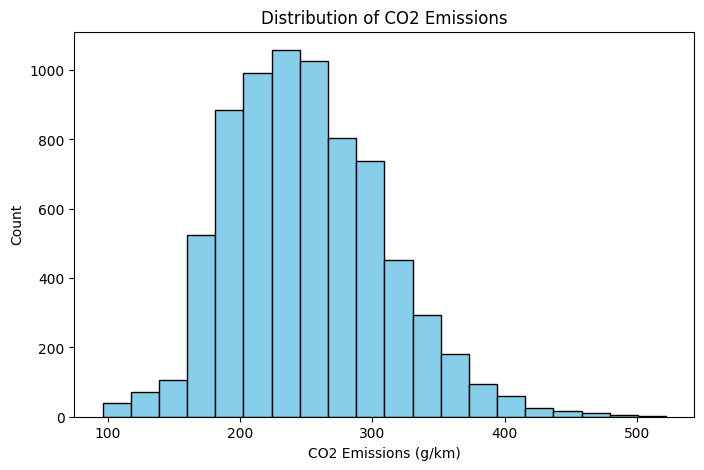

In [5]:
#1.Distribution of CO2 Emissions
plt.figure(figsize=(8,5))
plt.hist(df['CO2 Emissions(g/km)'], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Count")
plt.show()


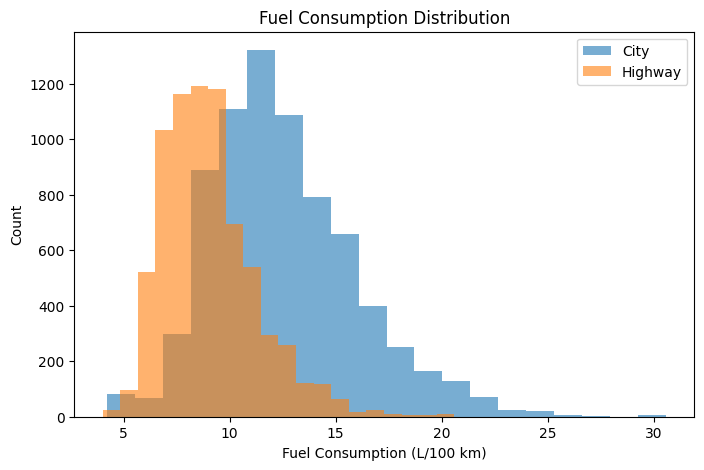

In [6]:
#2. Fuel Consumption Distribution (City vs Highway)
plt.figure(figsize=(8,5))
plt.hist(df['Fuel Consumption City (L/100 km)'], bins=20, alpha=0.6, label="City")
plt.hist(df['Fuel Consumption Hwy (L/100 km)'], bins=20, alpha=0.6, label="Highway")
plt.title("Fuel Consumption Distribution")
plt.xlabel("Fuel Consumption (L/100 km)")
plt.ylabel("Count")
plt.legend()
plt.show()


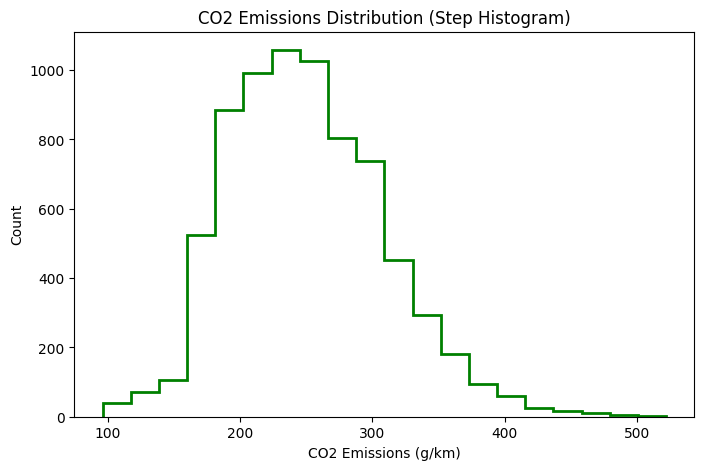

In [7]:
#3.CO2 Emissions Distribution → Step Histogram
plt.figure(figsize=(8,5))
plt.hist(df['CO2 Emissions(g/km)'], bins=20, color="green", histtype="step", linewidth=2)
plt.title("CO2 Emissions Distribution (Step Histogram)")
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Count")
plt.show()


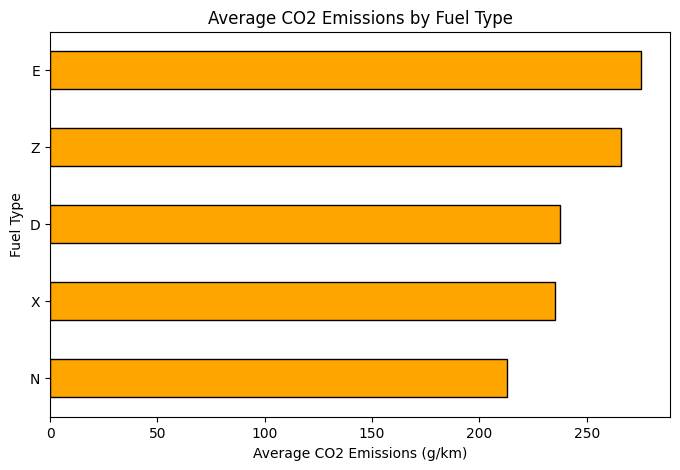

In [8]:
#4. Average CO2 Emissions by Fuel Type
avg_co2_fuel = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean().sort_values()
plt.figure(figsize=(8,5))
avg_co2_fuel.plot(kind="barh", color="orange", edgecolor="black")
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Average CO2 Emissions (g/km)")
plt.ylabel("Fuel Type")
plt.show()


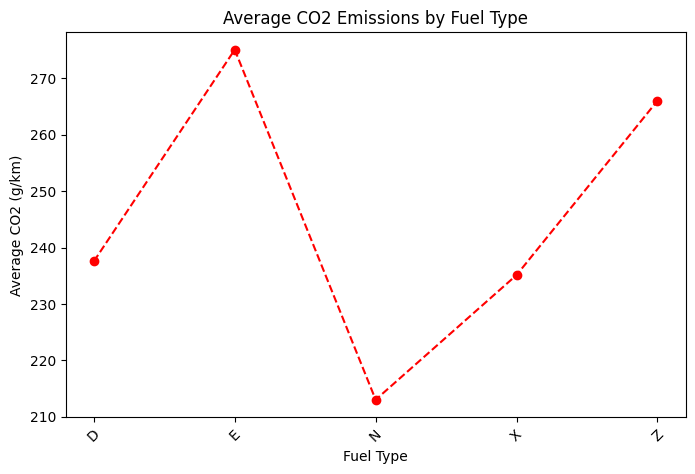

In [9]:
#5.Average CO2 Emissions by Fuel Type
avg_co2 = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].mean()
plt.figure(figsize=(8,5))
plt.plot(avg_co2.index, avg_co2.values, marker="o", linestyle="--", color="red")
plt.title("Average CO2 Emissions by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average CO2 (g/km)")
plt.xticks(rotation=45)
plt.show()


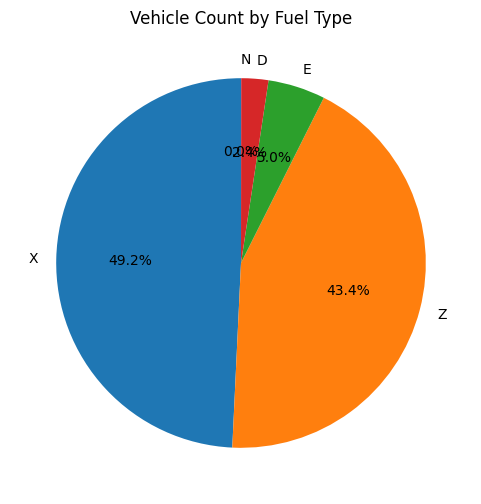

In [10]:
#6. Vehicle Count by Fuel Type
fuel_count = df["Fuel Type"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_count, labels=fuel_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Vehicle Count by Fuel Type")
plt.show()


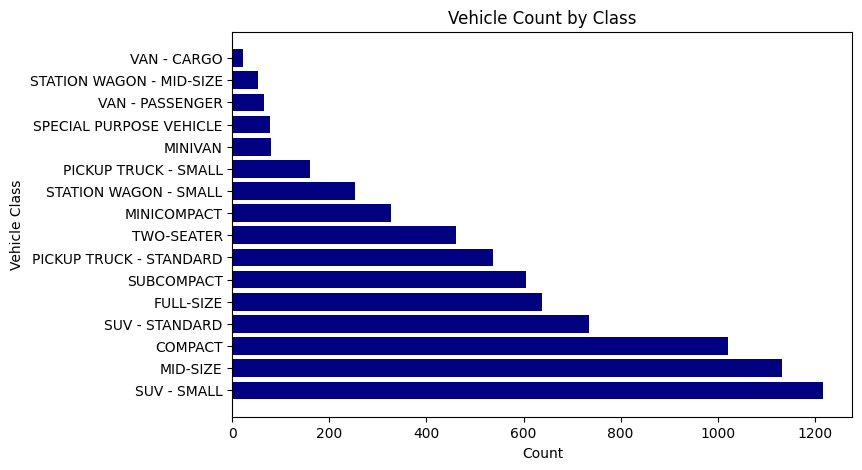

In [11]:
#7.Vehicle Count by Vehicle Class
class_count = df["Vehicle Class"].value_counts()
plt.figure(figsize=(8,5))
plt.barh(class_count.index, class_count.values, color="navy")
plt.title("Vehicle Count by Class")
plt.xlabel("Count")
plt.ylabel("Vehicle Class")
plt.show()


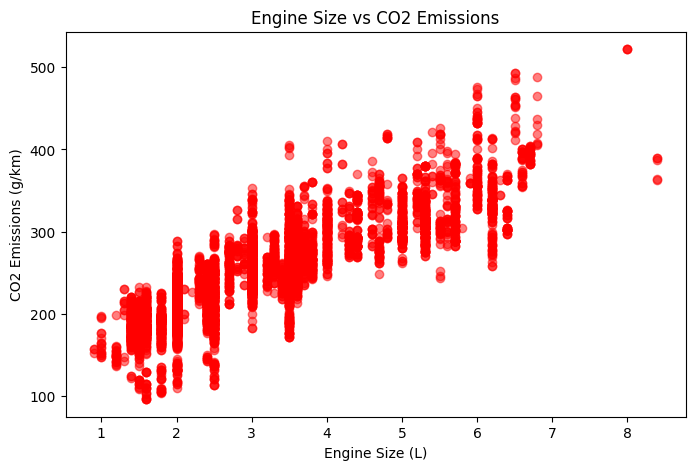

In [12]:
#8. Scatter Plot → Engine Size vs CO2 Emissions
plt.figure(figsize=(8,5))
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], alpha=0.5, c='red')
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()


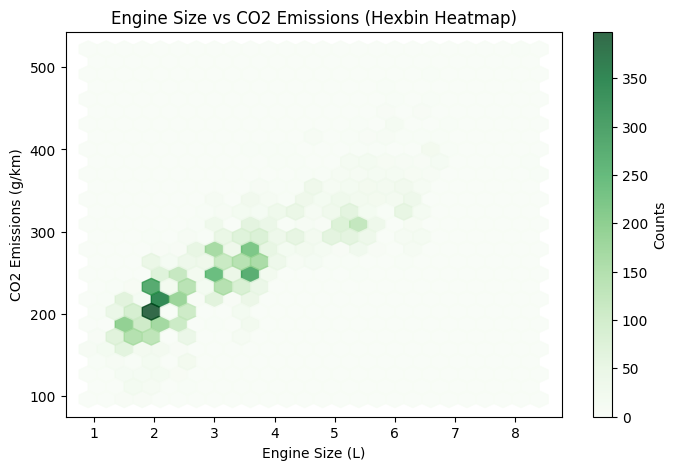

In [13]:
#9.Engine Size vs CO2 Emissions (Hexbin Heatmap)
plt.figure(figsize=(8,5))
plt.hexbin(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], gridsize=25, cmap="Greens", alpha=0.8)
plt.colorbar(label="Counts")
plt.title("Engine Size vs CO2 Emissions (Hexbin Heatmap)")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

<Figure size 1000x600 with 0 Axes>

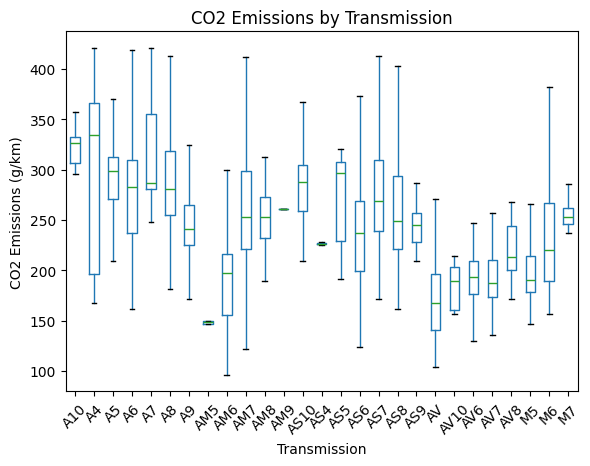

In [14]:
#10. Boxplot → CO2 by Transmission
plt.figure(figsize=(10,6))
df.boxplot(column="CO2 Emissions(g/km)", by="Transmission", grid=False, showfliers=False)
plt.title("CO2 Emissions by Transmission")
plt.suptitle("")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions (g/km)")
plt.xticks(rotation=45)
plt.show()

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, min, max

# Start Spark session
spark = SparkSession.builder.appName("CO2EmissionsCanada").getOrCreate()

# Load the dataset
df = spark.read.option("header", True).option("inferSchema", True).csv("CO2 Emissions_Canada.csv")


In [16]:
#1. Total number of vehicles---------------------
print("Total number of vehicles:", df.count())


Total number of vehicles: 7385


In [17]:
#2. Total number of fuel types------------------
print("Total number of fuel types:", df.select("Fuel Type").distinct().count())


Total number of fuel types: 5


In [18]:
#3. Fuel Type Names----------------------------
print("Fuel Types:")
df.select("Fuel Type").distinct().show()


Fuel Types:
+---------+
|Fuel Type|
+---------+
|        E|
|        D|
|        Z|
|        N|
|        X|
+---------+



In [19]:
#4. Total number of vehicles by fuel type----------
print("Vehicles by Fuel Type:")
df.groupBy("Fuel Type").count().show()


Vehicles by Fuel Type:
+---------+-----+
|Fuel Type|count|
+---------+-----+
|        E|  370|
|        D|  175|
|        Z| 3202|
|        N|    1|
|        X| 3637|
+---------+-----+



In [20]:
#5. Total number of vehicles by vehicle class-------
print("Vehicles by Vehicle Class:")
df.groupBy("Vehicle Class").count().show()


Vehicles by Vehicle Class:
+--------------------+-----+
|       Vehicle Class|count|
+--------------------+-----+
|         MINICOMPACT|  326|
|SPECIAL PURPOSE V...|   77|
|             COMPACT| 1022|
|         VAN - CARGO|   22|
|      SUV - STANDARD|  735|
|         SUV - SMALL| 1217|
|PICKUP TRUCK - ST...|  538|
|STATION WAGON - M...|   53|
|          TWO-SEATER|  460|
|          SUBCOMPACT|  606|
|            MID-SIZE| 1133|
|PICKUP TRUCK - SMALL|  159|
|           FULL-SIZE|  639|
|STATION WAGON - S...|  252|
|             MINIVAN|   80|
|     VAN - PASSENGER|   66|
+--------------------+-----+



In [21]:
#6. Vehicles grouped by Fuel Type & Transmission----
print("Vehicles by Fuel Type and Transmission:")
df.groupBy("Fuel Type", "Transmission").count().show()


Vehicles by Fuel Type and Transmission:
+---------+------------+-----+
|Fuel Type|Transmission|count|
+---------+------------+-----+
|        Z|         AV6|    9|
|        D|         AM6|    6|
|        X|          A5|   76|
|        X|        AV10|    4|
|        Z|          A6|   55|
|        E|         AS8|   18|
|        Z|         AS5|    4|
|        X|          A8|  234|
|        Z|          M6|  465|
|        D|        AS10|   14|
|        X|         AS9|   24|
|        Z|         AS9|   53|
|        Z|         AS8|  946|
|        Z|         AM8|   62|
|        Z|          A7|   53|
|        Z|          AV|    6|
|        X|         AS5|   22|
|        D|          A6|   36|
|        E|          A6|  166|
|        Z|         AV7|   30|
+---------+------------+-----+
only showing top 20 rows



In [22]:
#7. Min and Max CO2 emissions per vehicle class----
print("Minimum and maximum CO2 emissions in each vehicle class:")
df.groupBy("Vehicle Class").agg(
    min("CO2 Emissions(g/km)").alias("min_co2"),
    max("CO2 Emissions(g/km)").alias("max_co2")
).show()


Minimum and maximum CO2 emissions in each vehicle class:
+--------------------+-------+-------+
|       Vehicle Class|min_co2|max_co2|
+--------------------+-------+-------+
|         MINICOMPACT|    143|    365|
|SPECIAL PURPOSE V...|    208|    298|
|             COMPACT|    106|    404|
|         VAN - CARGO|    334|    396|
|      SUV - STANDARD|    156|    476|
|         SUV - SMALL|    128|    353|
|PICKUP TRUCK - ST...|    238|    414|
|STATION WAGON - M...|    126|    386|
|          TWO-SEATER|    145|    522|
|          SUBCOMPACT|    152|    392|
|            MID-SIZE|    104|    465|
|PICKUP TRUCK - SMALL|    235|    331|
|           FULL-SIZE|     96|    404|
|STATION WAGON - S...|    110|    382|
|             MINIVAN|    221|    296|
|     VAN - PASSENGER|    315|    488|
+--------------------+-------+-------+



In [23]:
#8. Vehicles with CO2 > average----------
avg_co2_val = df.agg(avg("CO2 Emissions(g/km)").alias("avg_co2")).collect()[0]["avg_co2"]

print("Vehicles with CO2 Emissions greater than average:")
df.filter(col("CO2 Emissions(g/km)") > avg_co2_val) \
  .select("Make", "Model", "Fuel Type", "CO2 Emissions(g/km)") \
  .show(20, truncate=False)


Vehicles with CO2 Emissions greater than average:
+------------+-----------------+---------+-------------------+
|Make        |Model            |Fuel Type|CO2 Emissions(g/km)|
+------------+-----------------+---------+-------------------+
|ACURA       |MDX 4WD          |Z        |255                |
|ACURA       |TL AWD           |Z        |255                |
|ACURA       |TL AWD           |Z        |267                |
|ASTON MARTIN|DB9              |Z        |359                |
|ASTON MARTIN|RAPIDE           |Z        |359                |
|ASTON MARTIN|V8 VANTAGE       |Z        |338                |
|ASTON MARTIN|V8 VANTAGE       |Z        |354                |
|ASTON MARTIN|V8 VANTAGE S     |Z        |338                |
|ASTON MARTIN|V8 VANTAGE S     |Z        |354                |
|ASTON MARTIN|VANQUISH         |Z        |359                |
|AUDI        |A6 QUATTRO       |Z        |251                |
|AUDI        |A7 QUATTRO       |Z        |262                |
|AUDI

In [24]:
#9. Increase CO2 by +10 for vehicles with Engine Size > 5.0L---
df_updated = df.withColumn("CO2 Emissions(g/km)",
                           col("CO2 Emissions(g/km)") + 
                           (10 * (col("Engine Size(L)") > 5.0).cast("int")))

print("Updated CO2 values for vehicles with Engine Size > 5.0L:")
df_updated.filter(col("Engine Size(L)") > 5.0).select("Make", "Engine Size(L)", "CO2 Emissions(g/km)").show(20, truncate=False)


Updated CO2 values for vehicles with Engine Size > 5.0L:
+------------+--------------+-------------------+
|Make        |Engine Size(L)|CO2 Emissions(g/km)|
+------------+--------------+-------------------+
|ASTON MARTIN|5.9           |369                |
|ASTON MARTIN|5.9           |369                |
|ASTON MARTIN|5.9           |369                |
|AUDI        |6.3           |373                |
|AUDI        |5.2           |357                |
|AUDI        |5.2           |419                |
|AUDI        |5.2           |357                |
|AUDI        |5.2           |419                |
|BENTLEY     |6.0           |366                |
|BENTLEY     |6.0           |390                |
|BENTLEY     |6.0           |390                |
|BENTLEY     |6.0           |398                |
|BENTLEY     |6.8           |447                |
|BMW         |6.0           |366                |
|CADILLAC    |6.2           |392                |
|CADILLAC    |6.2           |350           

In [25]:
#10. Save vehicles with CO2 > 300 into CSV----------
import os, shutil

# Change paths to your location
output_dir = r"C:\Users\sathw\High_CO2_Vehicles_temp"
final_file = r"C:\Users\sathw\High_CO2_Vehicles.csv"

high_co2_df = df.filter(col("CO2 Emissions(g/km)") > 300)

try:
    # Write Spark output to temp folder
    high_co2_df.coalesce(1) \
        .write.option("header", True) \
        .mode("overwrite") \
        .csv(output_dir)

    # Find the part file Spark created
    for file in os.listdir(output_dir):
        if file.startswith("part-") and file.endswith(".csv"):
            part_file = os.path.join(output_dir, file)
            # Move and rename to desired file
            shutil.move(part_file, final_file)
            break

    # Clean up temp directory
    shutil.rmtree(output_dir)

    print(f"✅ Saved vehicles with CO2 > 300 into: {final_file}")

except Exception as e:
    print("⚠️ Spark CSV write failed, using Pandas fallback...", e)
    high_co2_df.toPandas().to_csv(final_file, index=False)
    print("✅ Saved vehicles with CO2 > 300 using Pandas fallback.")


✅ Saved vehicles with CO2 > 300 into: C:\Users\sathw\High_CO2_Vehicles.csv


Conclusion

    --Overall, the dataset portrays a diverse Canadian automotive market with a wide mix of vehicles across size, power, and efficiency. The absence of missing data makes this dataset reliable for environmental policy analysis, automotive research, and predictive modeling of emissions. It highlights key industry trends: strong SUV and pickup representation, dominance of gasoline fuel types, and the growing presence of fuel-efficient models.